# ANCOVA

## Challenge 6.4: Combined effect of teacher and amount of self study, on students performance

Let us analyze the performance of students of primary school in the surprise test. The marks scored by various students is given below.

These 20 students belong to 4 different sections. It is known that different set of teachers take classes for different sections.

![](9_1.PNG)

### Setting the hypothesis

To find out, whether the performance of students is affected by the section they belong. (i.e. the teachers they have studied under), let’s conduct Anova Test.

Generally we start ANOVA test by considering a Null Hypothesis H0 . The Null hypothesis in this analysis is:

The performance of students is independent of the sections they belong to i.e. the mean of the marks scored by students from different sections are the same.

$$ \mu_{SecA} = \mu_{SecB} = \mu_{SecC} = \mu_{SecD} $$

### The control group

Here we need to find out the answers to two different questions. 

 1. Whether the section to which a student belongs to, has any effect on his/her performance in the surprise test? 
 2. If the answer to the previous question is yes, then how does the effect vary as the section changes?

To find out the answer to the first question, we need to compare the marks of 20 students who have been part of 4 sections with the mark of those students who haven't been part of any of these 4 sections i.e. who have no prior knowledge on the subjects from which questions were set. 

To put in another context, in order to find  out whether a fertilizer has any effect on the height of a tree, we need to apply the fertilizer to a tree and compare its height with another tree of similar kind to which no fertilizer was applied. 

These data (marks of students who have not been part of any of the sections/height of tree to which fertilizer was not applied), which we use as reference in order to find out whether there is any effect of the __treatments (section/fertilizer)__ on the outcome (mark scored by a student/ height of a tree) are called __Control group__. 

So to find out whether section of a student has any effect on his/her performance in the surprise test, the same question paper of the surprise test was also given to 5 different students of a different class (who haven’t studied any of the subjects from which questions were set up) and the marks scored by them were noted. These marks are treated as __reference or control group__. The data has been given below. 


| StudentID | Mark |
|-----------|------|
| 3001      | 250  |
| 3002      | 298  |
| 3003      | 358  |
| 3004      | 341  |
| 3005      | 168  |

To find out the answer to the second question i.e. how marks scored by student varies as the section changes, we need to perform ANOVA test.


### Performing ANOVA

The data on which we will be performing  ANOVA test is given below. 

![](9_2.PNG)

The last column contain the marks of the students from a different class which will be used as control group. These entries contain "None" in the section column. 

### Interpreting the result of ANOVA

In the Anova test we treat the 1st five rows (containing marks of students from a different class) as reference or control variable. The following command is executed to achieve that and Anova test was performed.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
student_marks = pd.read_excel('data/marks_section.xlsx')
student_marks

,StudentID,Section,Mark
0,3001,None,250
1,3002,None,298
2,3003,None,358
3,3004,None,341
4,3005,None,168
5,1001,A,438
6,1002,A,437
7,1003,A,527
8,1004,A,465
9,1005,A,413


In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = ols('Mark ~ Section', data = student_marks).fit()
aov_table = sm.stats.anova_lm(results, typ = 1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Section,4.0,99586.96,24896.74,8.804154,0.000287
Residual,20.0,56556.80,2827.84,NaN,NaN


The P value 0.000287 suggests Null hypothesis can be rejected and the alternate hypothesis can be accepted which is:  Performance of students in the test is NOT independent of their section.

### Covariate

[What is a covariate?](https://www.statisticshowto.com/covariate/)

From the Anova test we conclude that the performance of students depend upon the section to which they belong.

Now let us find out is there any other factor on which the performance of students depend.

Lets analyze one such factor that is the number of hours a student spends on studies per day. All the 20 students were asked how many hours they spend in studying every day and the data is shown below:

![](9_4.PNG)

Here we consider hours_per_day as a covariate, which has effect on the dependent variable Mark. Analyzing the effect of covariate on the dependent variable  is called __Analysis of Covariance or ANCOVA__.

### Relationship between the dependent variable and the covariate



In [8]:
mark_hour = pd.read_excel("data/marks_hour.xlsx")
Mark = mark_hour.Mark
Hours = mark_hour.Hours_per_Day
print('Correlation between Marks and Hours:  ',Mark.corr(Hours))

Correlation between Marks and Hours:   0.6843498815480881


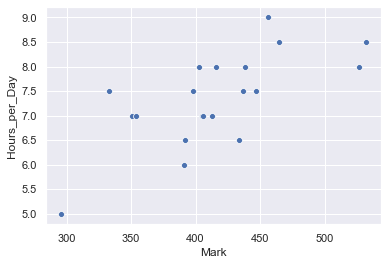

In [11]:
sns.scatterplot(data = mark_hour, x = 'Mark', y = 'Hours_per_Day');

Output of the corr() function and the scatter plot both show that there is a positive slope between Mark and Hours_per_Day i.e. the mark tends to increase as the hours of study increases.

### Regression line

As we found out mark scored by a student depends upon the no. of hours he/she has studied, we can call the mark attribute as dependent attribute and Hours_per_Day as an independent attribute.

Although the relationship between mark and Hours_per_Day is not completely linear, if we can think of a straight line which is closest to the points in the scatter plot, that can be used to represent the relationship between mark and Hours_per_day. 

This straight line is called as the regression line and gives the expected value of Mark for a known Hours_per_Day value. The regression line is represented as:

$$ \hat{Y} = bX + a $$

### Finding the regression line

The summary() function is used to find the regression line.  



In [13]:
from statsmodels.stats.anova import anova_lm
model = ols('Mark ~ Hours_per_Day', mark_hour).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mark   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     15.86
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           0.000874
Time:                        17:58:40   Log-Likelihood:                -102.65
No. Observations:                  20   AIC:                             209.3
Df Residuals:                      18   BIC:                             211.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       103.7795     78.678      1.319      0.204     -61.518     269.076
Hours_per_Day    42.3021     10.623      3.982      0.001      19.983      64.621
==============================================================================
Omnibus:                        0.200   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.067
Skew:                           0.108   Prob(JB):                        0.967
Kurtosis:                       2.818   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value 0.001 suggests there is significant effect of Hours_per_day on Mark.

The relationship between Mark and Hours_per_Day can be represented as 

                         $$ Mark = 42.30* Hours_per_Day + 103.78 $$
                         
### Plotting the regression line

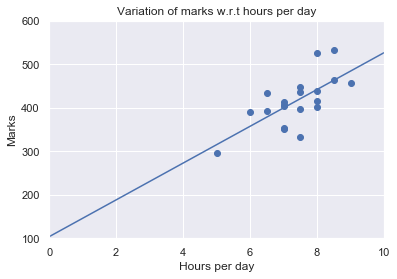

In [21]:
def abline(slope, intercept):
    """ Plot a line from slope and intercept """
    axes = plt.gca() # get the current axes instance
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope*x_vals
    plt.plot(x_vals, y_vals, '-')
    

plt.figure()    
plt.scatter(mark_hour.Hours_per_Day, mark_hour.Mark)
plt.xlim(0,10)
plt.ylim(100, 600)
plt.xlabel('Hours per day')
plt.ylabel('Marks')
plt.title('Variation of marks w.r.t hours per day')
abline(42.3, 103.78)
plt.show()

### Combined effect of independent variable and covariate

Using Anova we found out that mark of a student is NOT independent of the Section to which he/she belongs.

Using regression we found out the relation between marks and Hours_per_Day and found out the regression line.

As both of  these attributes i.e. section and Hours_per_Day have affect the Mark of a student, now let’s analyze the effect of both of these attributes on the mark scored by a student.

As done in the Anova test, we will consider the mark of the 5 students from a different class as reference/ control group. These 5 students have also been asked about the hours they spend in  studying. All these data is imported into mark_hour_2 data frame in Python environment executing the following commands.

In [22]:
mark_hour_2 = pd.read_excel('data/mark_hour_2.xlsx')
mark_hour_2

,StudentID,Section,Hours_per_Day,Mark
0,3001,None,6.0,250
1,3002,None,7.5,298
2,3003,None,8.0,358
3,3004,None,8.5,341
4,3005,None,7.0,168
5,1001,A,8.0,438
6,1002,A,7.5,437
7,1003,A,8.0,527
8,1004,A,8.5,465
9,1005,A,7.0,413


### ANCOVA Using summary() Function



In [23]:
from statsmodels.stats.anova import anova_lm
model = ols('Mark ~ Hours_per_Day + C(Section, Treatment(reference = "None"))', mark_hour_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mark   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     14.28
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           7.10e-06
Time:                        18:11:45   Log-Likelihood:                -125.22
No. Observations:                  25   AIC:                             262.4
Df Residuals:                      19   BIC:                             269.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       12.0429     75.436      0.160      0.875    -145.847     169.933
C(Section, Treatment(reference="None"))[T.A]   158.3537     26.584      5.957      0.000     102.713     213.994
C(Section, Treatment(reference="None"))[T.B]   118.2000     26.288      4.496      0.000      63.178     173.222
C(Section, Treatment(reference="None"))[T.C]    96.3695     26.948      3.576      0.002      39.966     152.773
C(Section, Treatment(reference="None"))[T.D]   161.2000     26.288      6.132      0.000     106.178     216.222
Hours_per_Day                                   36.6158      9.880      3.706      0.001      15.937      57.294
==============================================================================
Omnibus:                        3.017   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.575
Skew:                          -0.554   Prob(JB):                        0.455
Kurtosis:                       3.534   Cond. No.                         69.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analyzing result of ANCOVA

Lets analyze the output of summary() function. We will be focusing on the following section of the output:

![](9_5.PNG)

The first thing that we can notice is for each of the attributes(Hours_per_Day and different Sections) the P value (shown in the last column) is quite small. Which suggests these attributes have statistically significant effects on the dependent variable i.e. Mark. 

The first row gives the value of the intercept which is 24.05. Which suggests if a person does not study at all i.e. the Hours_per_Day is Zero, he will score 24.05 in the test. The second row suggests how the mark of a student varies with respect to Hours_per_Day, if we don’t take their sections into consideration. In other words it suggests how the marks of those first five students varies with respect to Hours_per_Day who were chosen from a different class (control group). From the table we can see, the intercept is 24.05 and the estimate for the attribute Hours_per_Day is 37.50.

So we can say that for a student, who has not been part of any of the four sections, expected Mark varies with respect to Hours_per_Day as per the following equation.

$$ Mark = 37.5 * Hours_per_Day + 24.05 $$

### Analyzing result of ANCOVA: Finding the regression lines

The subsequent rows (SectionA, SectionB, SectionC, SectionD) suggest how the mark of a student will be affected if he is put into any of these sections.

As we can see from the table the estimate for SectionA is 139.45. This value suggests that, the mark scored by a student who is not part of any sections, will increase by 139.45 if he is put into section A, provided he continues to study for the same no. of hours per day as he was studying.

Mark scored by a student who is not part of any of the section is given by:

![](9_6.PNG)

![](9_7.PNG)

### Visually representing result of ANCOVA

We can plot these 5 lines on the scatter plot of Mark v/s Hours_per_Day.  As all of these lines have equal slope (37.5), these lines will be parallel to each other.



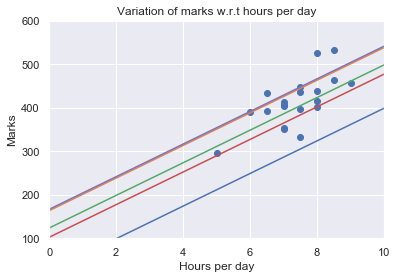

In [25]:
def abline(slope, intercept, label):
    """ Plot a line from slope and intercept """
    axes = plt.gca() # get the current axes instance
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope*x_vals
    plt.plot(x_vals, y_vals, '-', label = label)
    

plt.figure()    
plt.scatter(mark_hour.Hours_per_Day, mark_hour.Mark)
plt.xlim(0,10)
plt.ylim(100, 600)
plt.xlabel('Hours per day')
plt.ylabel('Marks')
plt.title('Variation of marks w.r.t hours per day')
abline(37.5,24.05,"No_Section")
abline(37.5,163.5,"Section A")
abline(37.5,123.7,"Section B")
abline(37.5,102.4,"Section C")
abline(37.5,166.7,"Section D")
plt.show()

###  Steps to perform 2 sample t test: Paired data

![](9_9.PNG)

Standard Error of the distribution = $\frac{S_d}{\sqrt{n}}$

where,

$$ s_d = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(d_i - \bar{d}))^2} $$

where,  
$\bar{d}$ = mean of all the differences  
$d_i$ = the paired differences

![](9_10.PNG)

![](9_11.PNG)

### Non-parametric Test

![](9_12.PNG)

#### [Shapiro Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

[Normality tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

To test normality of small samples

Larger p-value (conventionally p > 0.05) suggests the underlying population could be normally distributed

In [28]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Larger p-value (conventionally p > 0.05) suggests the underlying population could be normally distributed - Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Larger p-value (conventionally p > 0.05) suggests the underlying population could be normally distributed - Sample looks Gaussian (fail to reject H0)


#### [Kruskal Wallis test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

Test if samples from different populations have different means and if the populations don’t have normal distributions

[How to Calculate Nonparametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)



In [29]:
# Kruskal-Wallis H-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Statistics=6.051, p=0.049
Different distributions (reject H0)


Conventionally, p-value lesser than 0.05 indicates significant difference between the medians and greater than 0.05 provides no such evidence  

### Course Summary

We have learnt the following in this course:

- Samples and Sampling Methods
- Finding point estimate of a population parameters using maximum likelihood estimation
- Determining the unbiasedness of an estimator
- Finding unbiased estimator of population parameters 
- Finding interval estimate i.e. confidence interval of population parameters
- Performing hypothesis test to validate the estimated values
- Estimating difference between two population means
- Comparing performance of two independent groups by performing 2 sample t test
- Comparing performance of two dependent samples by performing 2 sample t test for paired data
- Comparing performance of more than two groups by performing one way ANOVA
- Analyzing the combined effect of two categorical independent variables on dependent variable by performing two way ANOVA
- Analyzing effect of covariate on the dependent attribute by performing ANCOVA
- Steps to perform 2 sample t test: Paired data
- Non-parametric test
- shapiro wilk test
- Kruskal-Wallis H-test


### Capstone Project - Statistical Inference

#### Problem description: 

Once a wise businessman said: “My product may not be the best product, but I have the sales because I know the consumers”. If one understands the demographic features of the consumers, then it becomes easier to figure out their requirements and align the product in order to cater to their needs. It is very important for economies to predict the earning capacity of individuals for VISA processing. Individuals with high potential add value to their market.  

#### Problem 1: 

An organization has the demographic data (see Data Source section) and wants to draw marketing insights from the data. It wants you to derive statistical inferences from the dataset, as given below: 
- Infer with confidence, the relationship between marital status and the occupation type. Draw sufficient insights through visualization 
- Similarity in earning potential of people with Bachelor’s degree and Master’s degree •Similarity of earning potential between people from Asia, Africa, North America, and Central America. Draw sufficient insights through visualization 
- Distribution parameters for age and number of years of education 

#### Instructions for problem solving: 

- Data source: 
The dataset for the problem is available at the below mentioned link: 

- [Home page link](https://archive.ics.uci.edu/ml/datasets/adult) 
- [Dataset Train](https://archive.ics.uci.edu/ml/machine-learningdatabases/adult/adult.data)
- [Dataset Test](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test)
- [Data set description](https://archive.ics.uci.edu/ml/machine-learningdatabases/adult/adult.names)
